<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:

In [4]:
nhl = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [5]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [6]:
nhl.Rank.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

In [7]:
nhl.Rank.unique()

array([1, 2, 3])

In [8]:
nhl.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


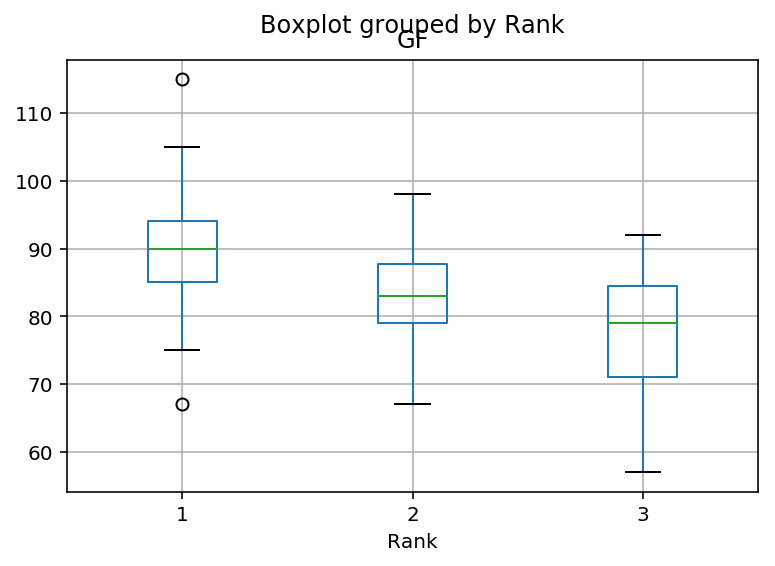

In [9]:
nhl.boxplot(column='GF',by = 'Rank')

In [10]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [11]:
nhl.columns

Index([u'Team', u'PTS', u'Rank', u'TOI', u'GF', u'GA', u'GF60', u'GA60',
       u'GF%', u'SF', u'SA', u'SF60', u'SA60', u'SF%', u'FF', u'FA', u'FF60',
       u'FA60', u'FF%', u'CF', u'CA', u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%',
       u'PDO', u'PIM'],
      dtype='object')

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
feature_cols = ['GF', u'GA','FF', u'FA','SF', u'SA']
X = nhl[feature_cols]

In [14]:
y = nhl.Rank

### 4. What is the baseline accuracy?

In [15]:
# A:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a188f1d10>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

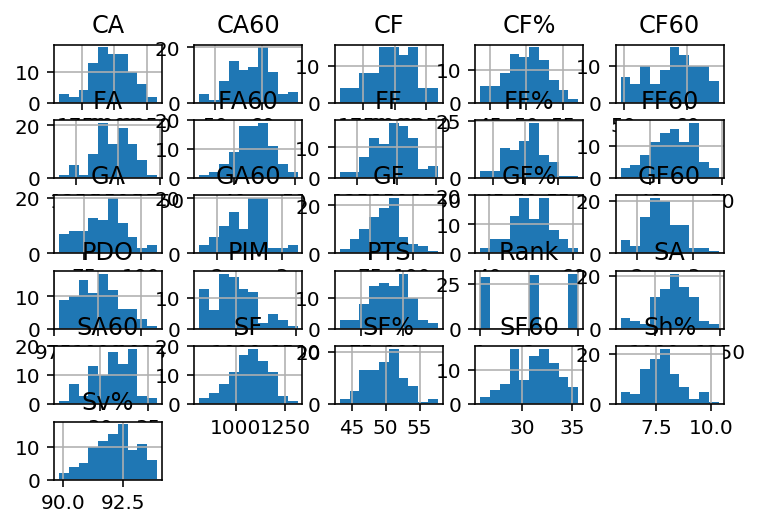

In [16]:
plt.figure()
nhl.hist()

In [17]:
31/float(len(nhl))

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [18]:
feature_cols = ['GF', u'GA','FF', u'FA','SF', u'SA']
X = nhl[feature_cols]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
knn.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [21]:
# A:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [24]:
knn.score(X_test, y_test)

0.5217391304347826

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .5)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
knn_predict = knn.predict(X_test)

In [28]:
metrics.accuracy_score(y_test, knn_predict)

0.4666666666666667

In [29]:
# A:

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [30]:
knn = KNeighborsClassifier(n_neighbors=90)

In [31]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='uniform')

In [32]:
knn.score(X,y)

0.34444444444444444

In [33]:
knn = KNeighborsClassifier(n_neighbors=67)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=67, p=2,
           weights='uniform')

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [36]:
result_list = []
for i in range(1,44):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    #knn_preds = knn.predict(X_test)
    score = float(sum(knn_preds == y_test)) / len(y_test)
    print("The accuracy score of {} neighbor is {}".format(i, score))
    knn_result = result_list.append(score)
plt.plot(i, knn_result)

NameError: name 'knn_preds' is not defined

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

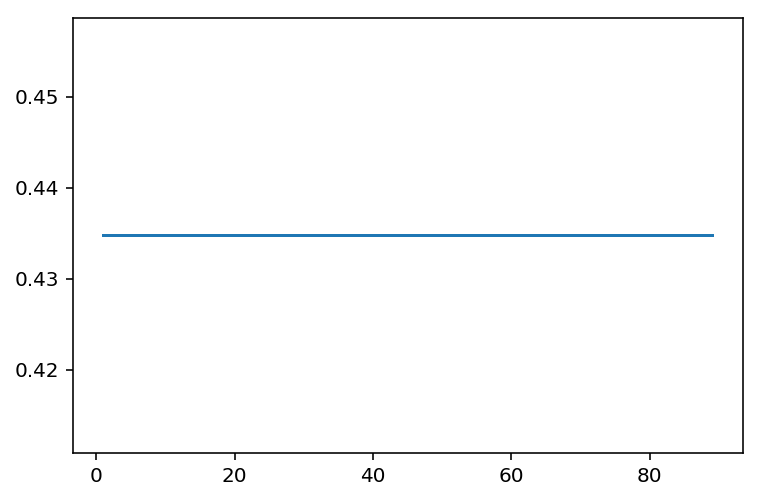

In [38]:
acc = []
n = []
for i in range(1,90):
    KNN = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    n.append(i)
    acc.append(knn.score(X_test, y_test))
plt.plot(n,acc)

In [ ]:
# A:

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [39]:
from sklearn.model_selection import cross_val_score

ValueError: x and y must have same first dimension, but have shapes (5,) and (158,)

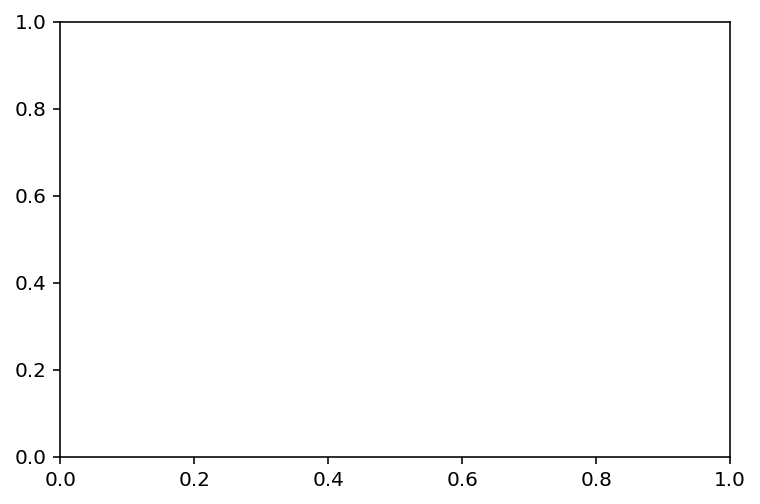

In [40]:
for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X,y)
    n.append(i)
    a = cross_val_score(knn, X,y,cv = 5)
    acc.append(np.mean(a))
plt.plot(a,acc)

In [43]:
len(acc)

158

In [ ]:
plt.plot(a,acc)

In [ ]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

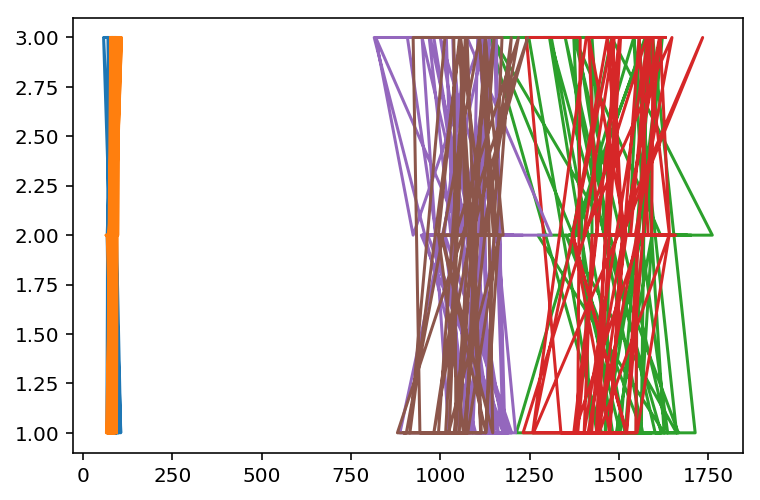

In [45]:
plt.plot(X_train, y_train)

In [ ]:
# A: